<a href="https://colab.research.google.com/github/wojwozniak/university/blob/master/Machine_Learning/List01/List01Task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 of [first UWr_ML_2024 homework](https://github.com/wojwozniak/university/blob/master/Machine_Learning/List01/Homework_1.pdf)

Let's start by importing required libraries and loading the dataset
(dataset is availible by default in tensorflow library)

In [5]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Test if we loaded data correctly
# print(x_train.shape) # Expected value (60000, 28, 28)
# print(x_test.shape) # Expected value (10000, 28, 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Step 1

Normalize the pixel values (e.g., divide by 255 to scale between
0 and 1) and select a random 10% subset of the dataset.

In [6]:
# Step 1a: Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Step 1b: Randomly select 10% of the data

# I set the seed for reproducibility -> comment out for "randomness"
np.random.seed(42)

# We have 60000 elements in training data and 10000 in testing data,

# Generate 6000 random indices, take those elements from the training data arrays
train_random_indices = np.random.choice(x_train.shape[0], 6000, replace=False)
x_train_10 = x_train[train_random_indices]
y_train_10 = y_train[train_random_indices]

# -,,- 1000 -,,- training -,,-
test_random_indices = np.random.choice(x_test.shape[0], 1000, replace=False)
x_test_10 = x_test[test_random_indices]
y_test_10 = y_test[test_random_indices]

# Test if we took data out correctly
# print(x_train_10.shape) # Expected value (6000, 28, 28)
# print(x_test_10.shape) # Expected value (1000, 28, 28)

## Step 2 - KNN Classifier
Use the KNeighborsClassifier from sklearn.neighbors. Iterate over different
values of k, specifically k = 1, 2, . . . , 10.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 11)

accuracies = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_10.reshape(6000, -1), y_train_10)

    y_pred = knn.predict(x_test_10.reshape(1000, -1))

    accuracy = accuracy_score(y_test_10, y_pred)
    accuracies[k] = accuracy

    print(f"Accuracy for k={k}: {accuracy:.6f}")

Accuracy for k=1: 0.939000
Accuracy for k=2: 0.921000
Accuracy for k=3: 0.942000
Accuracy for k=4: 0.937000
Accuracy for k=5: 0.936000
Accuracy for k=6: 0.937000
Accuracy for k=7: 0.937000
Accuracy for k=8: 0.938000
Accuracy for k=9: 0.940000
Accuracy for k=10: 0.936000


## Step 3 - Bootstrap Resampling
• For each value of k, perform several bootstrap iterations:
- Resample the entire dataset with replacement to create a training set.
- Train the KNN model on the resampled data.
- Test the model on the remaining data points (out-of-bag data).
- Compute and store the accuracy on the out-of-bag data for each iteration.

Let's start by creating a function that will do the task for given k neighbors and n bootstrap iterations

In [8]:
def bootstrap_knn(x_data, y_data, k, n_iterations = 50):
    """
    Perform bootstrap resampling with KNN and return OOB accuracies

    Parameters:
        x_data (array with shape): Images
        y_data (array): Labels
        k (int): Number of neighbors for KNNClassifier
        n_iterations: Number of bootstrap iterations
    """

    # Store out out-of-bag accuracies for each iteration
    oob_accuracies = []
    for i in range(n_iterations):

        # Step 1: Resample the dataset with replacement
        #   In each iteration we select elements from the array,
        #   allowing some to appear multiple times (bootstraping)
        indices = np.random.choice(len(x_data), len(x_data), replace=True)
        x_train_bootstrap = x_data[indices]
        y_train_bootstrap = y_data[indices]

        # Step 2: Get OOB data points (ones not includes in the resample)
        oob_indices = list(set(range(len(x_data))) - set(indices))
        x_oob = x_data[oob_indices]
        y_oob = y_data[oob_indices]

        # Edge case - no OOB samples - skip iteration
        if len(x_oob) == 0:
            continue

        # Step 3: Train model on bootstrap data
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train_bootstrap.reshape(len(x_train_bootstrap), -1), y_train_bootstrap)

        # Step 4: Calculate accuracy using OOB data
        y_pred_oob = knn.predict(x_oob.reshape(len(x_oob), -1))
        oob_accuracy = accuracy_score(y_oob, y_pred_oob)
        oob_accuracies.append(oob_accuracy)

    return oob_accuracies

We have our function - now let's finish step 3 by running several (let's say 50) bootstrap iterations for each k neighbors value (ones that we used before, so 1...10)


In [13]:
k_values = range(1, 11)

average_oob_accuracies = {}

for k in k_values:
    print(f"Running task for k={k} neighbors")
    oob_accuracies = bootstrap_knn(x_train_10, y_train_10, k, n_iterations = 50)

    # Calculate accuracy for this k
    average_oob_accuracies[k] = np.mean(oob_accuracies)
    print(f"Average accuracy for k={k}: {average_oob_accuracies[k]:.6f}:")


Running task for k=1 neighbors
Average accuracy for k=1: 0.930077:
Running task for k=2 neighbors
Average accuracy for k=2: 0.917327:
Running task for k=3 neighbors
Average accuracy for k=3: 0.926451:
Running task for k=4 neighbors
Average accuracy for k=4: 0.922829:
Running task for k=5 neighbors
Average accuracy for k=5: 0.920224:
Running task for k=6 neighbors
Average accuracy for k=6: 0.920003:
Running task for k=7 neighbors
Average accuracy for k=7: 0.922255:
Running task for k=8 neighbors
Average accuracy for k=8: 0.920940:
Running task for k=9 neighbors
Average accuracy for k=9: 0.923383:
Running task for k=10 neighbors
Average accuracy for k=10: 0.918784:


We can see similar values for each k - ~92%. We use quite a lot of bootstrap iterations - running the codeblock took 8 minutes. Let's proceed to step 4, where we will experiment with different amounts of iterations

## Step 4 - Determine Optimal k and Bootstrap Iterations
- Experiment with different numbers of bootstrap iterations (e.g., try 1, 2, 11, 22, 44, 88, etc.).
- Calculate the mean accuracy across bootstrap iterations for each k.
- Determine the optimal k and the number of iterations required for a stable estimate.

In [17]:
# Amounts of bootstrap iterations to test
bootstrap_iteration_values = [1, 2, 11, 22, 44, 88]

# Dictionary for results
results = {}

# Range of k values
k_values = range(1, 11)

for k in k_values:
    results[k] = {}
    for n_iterations in bootstrap_iteration_values:
        # Run function for each k and each amount of bootstrap iterations
        obb_accuracy_value = bootstrap_knn(x_train_10, y_train_10, k, n_iterations=n_iterations)

        # Calculate and store accuracies
        results[k][n_iterations] = np.mean(obb_accuracy_value)
        print(f"Mean accuracy for k={k} with {n_iterations} iterations: {results[k][n_iterations]:.6f}")

Mean accuracy for k=1 with 1 iterations: 0.931991
Mean accuracy for k=1 with 2 iterations: 0.936021
Mean accuracy for k=1 with 11 iterations: 0.932609
Mean accuracy for k=1 with 22 iterations: 0.931300
Mean accuracy for k=1 with 44 iterations: 0.931240
Mean accuracy for k=1 with 88 iterations: 0.931475
Mean accuracy for k=2 with 1 iterations: 0.923323
Mean accuracy for k=2 with 2 iterations: 0.928272
Mean accuracy for k=2 with 11 iterations: 0.922523
Mean accuracy for k=2 with 22 iterations: 0.923825
Mean accuracy for k=2 with 44 iterations: 0.922863
Mean accuracy for k=2 with 88 iterations: 0.923545
Mean accuracy for k=3 with 1 iterations: 0.917710
Mean accuracy for k=3 with 2 iterations: 0.928967
Mean accuracy for k=3 with 11 iterations: 0.923838
Mean accuracy for k=3 with 22 iterations: 0.925035
Mean accuracy for k=3 with 44 iterations: 0.923752
Mean accuracy for k=3 with 88 iterations: 0.924202
Mean accuracy for k=4 with 1 iterations: 0.914596
Mean accuracy for k=4 with 2 iteration

## Step 5 - Plot
- Plot the mean accuracy for each value of k.
- Include another plot showing how the mean accuracy stabilizes with increasing bootstrap iterations.

First plot - mean accuracy for different numbers of neighbors

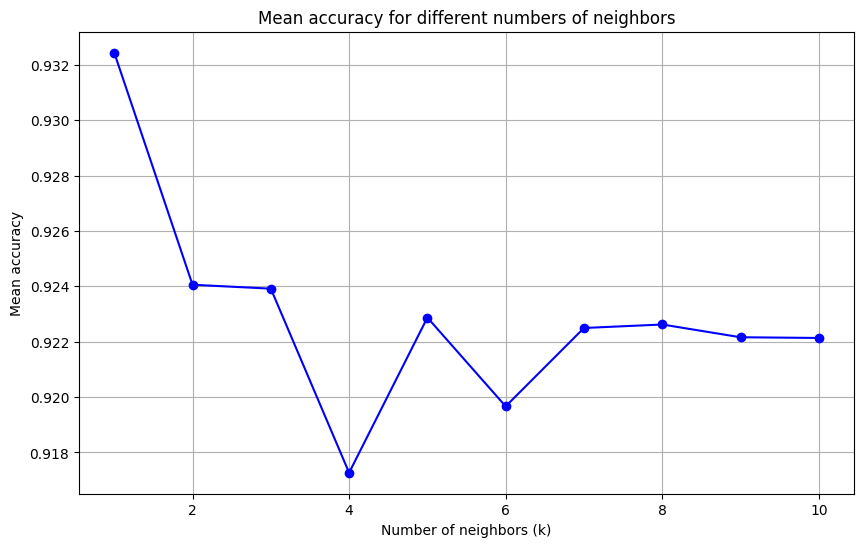

In [19]:
import matplotlib.pyplot as plt

k_values_list = list(results.keys())
mean_accuracies_for_k = [np.mean(list(iterations.values())) for iterations in results.values()]

plt.figure(figsize=(10,6))
plt.plot(k_values_list, mean_accuracies_for_k, marker='o', color='b')
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Mean accuracy")
plt.title("Mean accuracy for different numbers of neighbors")
plt.grid()
plt.show()

Second plot - for bootstrap amounts, mean accuracy of all k-values

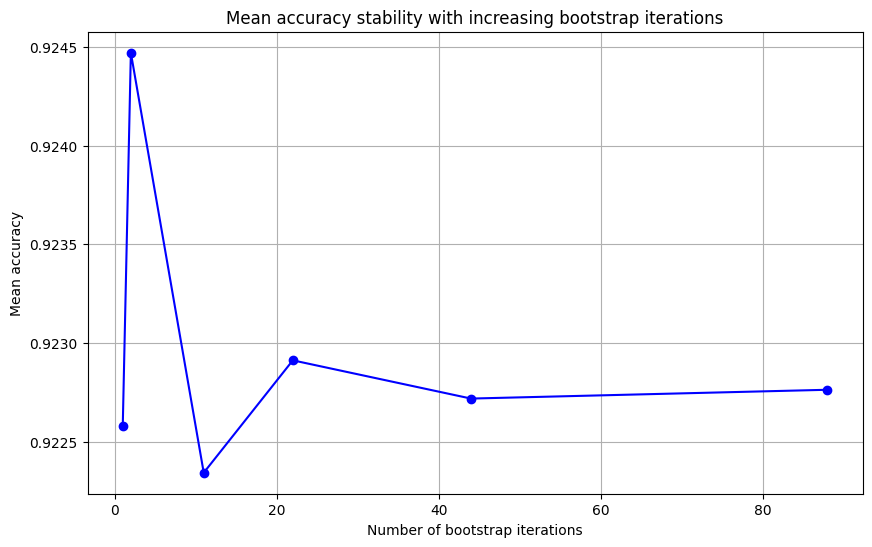

In [20]:
import matplotlib.pyplot as plt

iteration_counts = list(results[k_values_list[0]].keys())
mean_accuracies_for_iterations = [np.mean([results[k][n] for k in k_values_list]) for n in iteration_counts]

plt.figure(figsize=(10,6))
plt.plot(iteration_counts, mean_accuracies_for_iterations, marker='o', color='b')
plt.xlabel("Number of bootstrap iterations")
plt.ylabel("Mean accuracy")
plt.title("Mean accuracy stability with increasing bootstrap iterations")
plt.grid()
plt.show()